# Predicting Dengue Cases in San Juan, Puerto Rico and Iquitos, Peru

Competition Description:

https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

In [217]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [218]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [219]:
# read in features, parse the date column to date object

df = pd.read_csv('datasets/dengue_features_train.csv', parse_dates=[3])

# add total cases into df
df['total_cases'] = target['total_cases']
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [288]:
# target

target = pd.read_csv('datasets/dengue_labels_train.csv')
target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [289]:
target.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.0,1997.00,2002.0,2005.00,2010.0
weekofyear,1456.0,26.503434,15.019437,1.0,13.75,26.5,39.25,53.0
total_cases,1456.0,24.675137,43.596000,0.0,5.00,12.0,28.00,461.0


### Clean

In [223]:
# create new datasets

df_sj = df[df['city'] == 'sj']
df_iq = df[df['city'] == 'iq']

print 'San Juan shape: {}'.format(df_sj.shape)
print 'Iquitos shape: {}'.format(df_iq.shape)

San Juan shape: (936, 25)
Iquitos shape: (520, 25)


In [290]:
## FrontFill to Impute into Missing values

df_sj = df_sj.fillna(method = 'ffill')
df_iq = df_iq.fillna(method = 'ffill')

## EDA

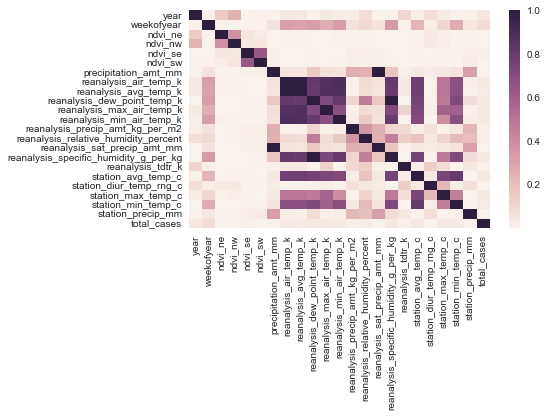

In [225]:
# San Juan
sns.heatmap(df_sj.corr()**2)

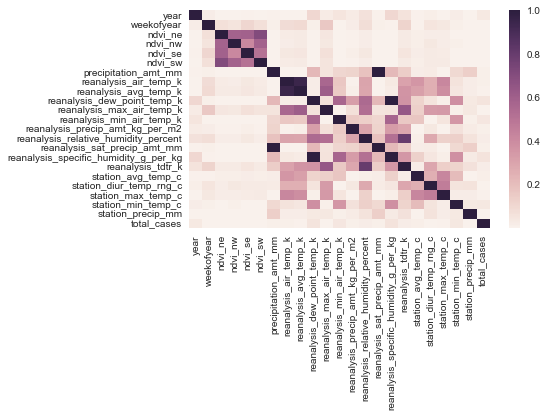

In [226]:
# Iquitos
sns.heatmap(df_iq.corr()**2)

#### Correlation Plot Conclusions

Total Cases does not correlate to any specific feature individually (see uncolored line at the bottom and far right or each plot). However, there are two interesting differences to note in two 'categories' of features:

** NVDI: ** The satellite imagery score of the vegetation growing in the city does not move together as much as I thought it would. This is especially true in San Juan. The North quadrants and the South quadrants have almost no relation to each other. There is a stronger correlation in Iquitos, but still not as strong as I had originally thought. This will make feature extraction difficult as I cannot simply combine the NVDI scores into one dimension.

** Temperature: ** The temperature variables (`reanalysis_air_temp_k` to `reanalysis_min_air_temp_k`) are strongly correlated together in San Juan, but not in Iquitos. Again, this makes feature extraction more difficult in Iquitos.

Both of these findings point to the need to create a unique model for each city.



## Feature change over time

Because this will likely be a time-series analysis, it is important to see how these features change over the timespan of our data.

In [227]:
# set index to the dates
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

### NVDI
The Normalized Difference Vegetation Index measures the amount of vegetation in the four quadrants (NE, NW, SE, SW) of the city. Satellite photos measure the 'surface area vegetation activity' and is further described here: https://www.ncdc.noaa.gov/cdr/terrestrial/normalized-difference-vegetation-index

In [228]:
# create mean NVDI for each week for each city
df_sj['nvdi_mean'] = df_sj[df_sj.columns[3:7]].mean(axis = 1)
df_iq['nvdi_mean'] = df_iq[df_iq.columns[3:7]].mean(axis = 1)

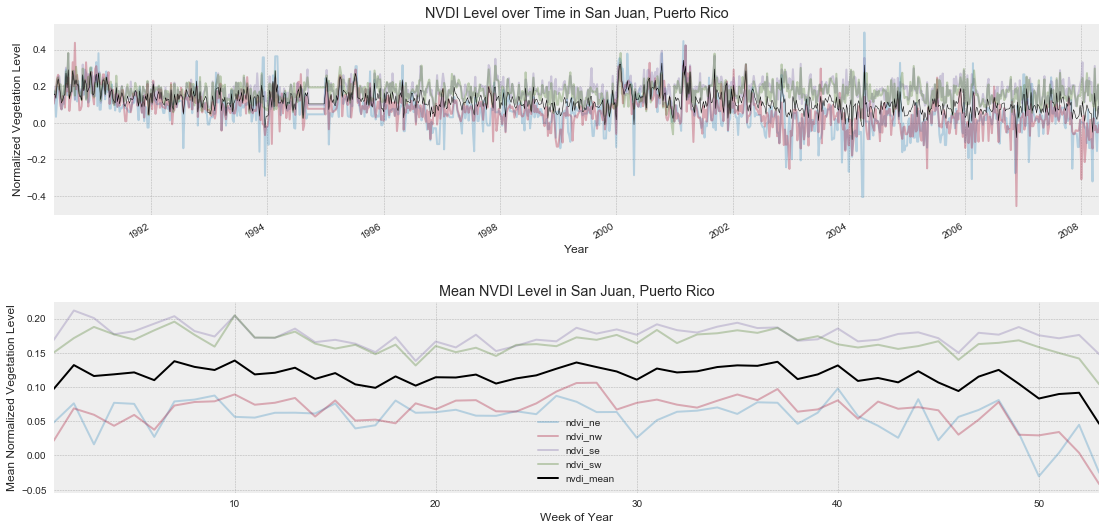

In [229]:
# plot week by week and yearly average for San Juan
fig, ax = plt.subplots(2, 1, figsize=(16, 8))

#top plot
plt.subplot(211)
for i in df_sj.columns[3:7]:
    df_sj[i].plot(alpha = .3)
df_sj['nvdi_mean'].plot(alpha = 1, c = 'k', linewidth = .5)
plt.title('NVDI Level over Time in San Juan, Puerto Rico')
plt.xlabel('Year')
plt.ylabel('Normalized Vegetation Level')

# bottom plot
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_sj.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 2)
plt.title('Mean NVDI Level in San Juan, Puerto Rico')
plt.xlabel('Week of Year')
plt.ylabel('Mean Normalized Vegetation Level')
plt.legend(loc = 'best')
    
plt.tight_layout(pad=3)

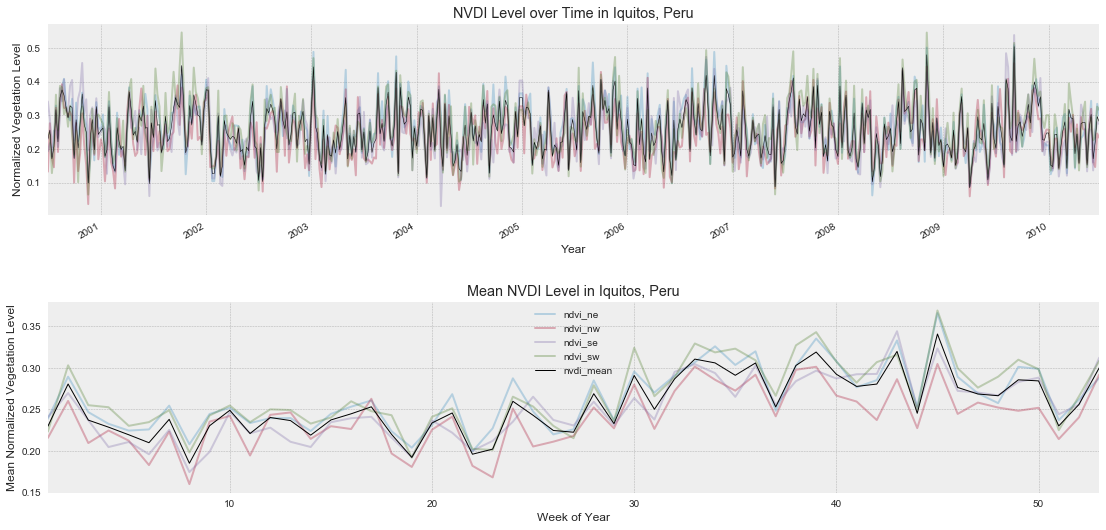

In [230]:
# plot week by week and yearly average for Iquitos
fig, ax = plt.subplots(2, 1, figsize=(16, 8))

#top plot
plt.subplot(211)
for i in df_iq.columns[3:7]:
    df_iq[i].plot(alpha = .3)
df_iq['nvdi_mean'].plot(alpha = 1, c = 'k', linewidth = .5)
plt.title('NVDI Level over Time in Iquitos, Peru')
plt.xlabel('Year')
plt.ylabel('Normalized Vegetation Level')

# bottom plot
plt.subplot(212)
for i in df_iq.columns[3:7]:
    df_iq.groupby('weekofyear')[i].mean().plot(alpha = .3)
df_iq.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 1)
plt.title('Mean NVDI Level in Iquitos, Peru')
plt.xlabel('Week of Year')
plt.ylabel('Mean Normalized Vegetation Level')
plt.legend(loc = 'best')
    
plt.tight_layout(pad=3)


### NVDI Feature Conclusions
I know I said that the correlation plot showed a reason not to take the average of the NVDI features for each week because they do not move in sync with each other. Still, it is important to visualize related features to see any patterns.

** San Juan: ** The NVDI scores in the Southwest and Southeast are consistently lower than the scores of the Northwest and Northeast quadrants. After averaging the score at each week over the 10 years of data, we can see that the NVDI score remains fairly constant. There is a minor dip in the last 4 weeks of the year (December) that could be interesting. In addition, we can see the impact of the front fill method for data imputation. In 1995, there were a few missing rows of NVDI data. The flat line comes from repeating the last known value over and over until an observation was recorded again.

** Iquitos: ** Iquitos shows a more homogenous NVDI score among its four quadrants. Visually, I can see an increase from Week 20 at 0.20 to Week 40 at 0.30 (May to October) in the NVDI scores .


## Weather

In order to visualize weather features of various metrics, we need to standardize them to get rid of the units. Millimeters of rain and degrees Celcius won't look good together.

In [244]:
from sklearn.preprocessing import StandardScaler

In [276]:
#Standardize SJ
ss = StandardScaler()
Xs = ss.fit_transform(df_sj[df_sj.columns[7:23]])
df_sj_s = pd.DataFrame(Xs, columns = df_sj.columns[7:23], index=df_sj.index)
df_sj_s['weekofyear'] = df_sj['weekofyear']

#Standardize IQ
ss = StandardScaler()
Xs = ss.fit_transform(df_iq[df_iq.columns[7:23]])
df_iq_s = pd.DataFrame(Xs, columns = df_iq.columns[7:23], index=df_iq.index)
df_iq_s['weekofyear'] = df_iq['weekofyear']

In [280]:
# see all weather features
df_sj_s.columns[:-1]

Index([u'precipitation_amt_mm', u'reanalysis_air_temp_k',
       u'reanalysis_avg_temp_k', u'reanalysis_dew_point_temp_k',
       u'reanalysis_max_air_temp_k', u'reanalysis_min_air_temp_k',
       u'reanalysis_precip_amt_kg_per_m2',
       u'reanalysis_relative_humidity_percent',
       u'reanalysis_sat_precip_amt_mm',
       u'reanalysis_specific_humidity_g_per_kg', u'reanalysis_tdtr_k',
       u'station_avg_temp_c', u'station_diur_temp_rng_c',
       u'station_max_temp_c', u'station_min_temp_c', u'station_precip_mm'],
      dtype='object')

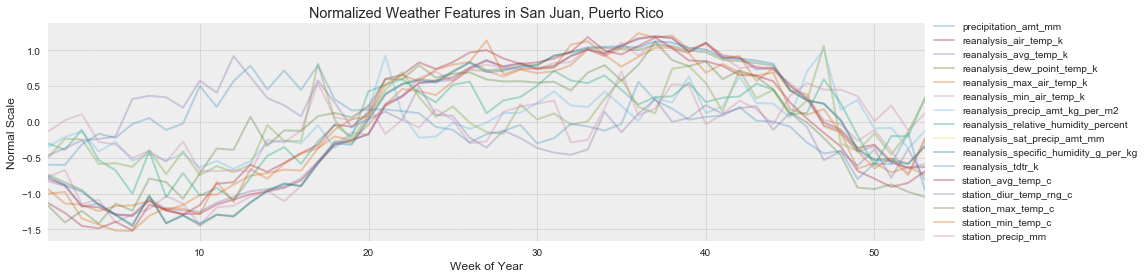

In [350]:
#Plot all Normalized weather data in San Juan

for i in (df_sj_s.columns[:-1]):
    df_sj_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (14, 4)).\
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Normalized Weather Features in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

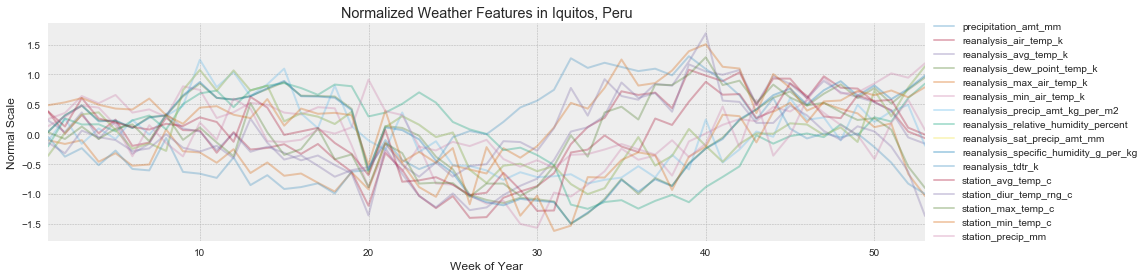

In [351]:
#Plot all Normalized weather data in Iquitos

for i in (df_iq_s.columns[:-1]):
    df_iq_s.groupby('weekofyear')[i].mean()\
    .plot(alpha = .3, figsize = (14, 4))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('Normalized Weather Features in Iquitos, Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

### Weather Conclusions

As we can see from the list of weather features, there are a couple of overlapping features that we are using. such as:

* `precipitation_amt_mm`, `reanalysis_precip_amt_kg_per_m2`, `reanalysis_sat_precip_amt_mm`, and `station_precip_mm` all measure the rainfall in various ways
* `reanalysis_air_temp_k`, `reanalysis_avg_temp_k`, `reanalysis_dew_point_temp_k`, `reanalysis_max_air_temp_k`, `reanalysis_min_air_temp_k`, `reanalysis_tdtr_k`, `station_avg_temp_c`, `station_diur_temp_rng_c`, `station_max_temp_c`, and `station_min_temp_c` all measure various forms of the temperature.
* `reanalysis_relative_humidity_percent` and `reanalysis_specific_humidity_g_per_kg` measure the humidity.

Each city follows a different trend (which makes sense, being in different hemispheres and climates).

** San Juan: ** Hot, Wet and Humid. This time, it is in San Juan where we see an increase in all features from Week 20 to Week 40.

** Iquitos: ** Variaion. The weather features do not move as tightly as San Juan does. Again, this was shown in the correlation plot above.


## Target Exploration

In my last notebook, I visually explored the change in the target over time. Now I'd like to explore the outliers in the target set, also known as the outbreaks. It is very likely that there will be ourbreaks in the test set, so I must tune whatever model I use to be be able to predict an outlier.

In [352]:
# create sj and iq targets df
target_sj = target[target['city'] == 'sj']
target_iq = target[target['city'] == 'iq']

In [357]:
print 'San Jose cases - Mean: {} and STD: {}'.format(target_sj['total_cases'].mean(), target_sj['total_cases'].std())
print 'Iquitos cases - Mean: {} and STD: {}'.format(target_iq['total_cases'].mean(), target_iq['total_cases'].std())

San Jose cases - Mean: 34.1805555556 and STD: 51.3813724972
Iquitos cases - Mean: 7.56538461538 and STD: 10.7654783422


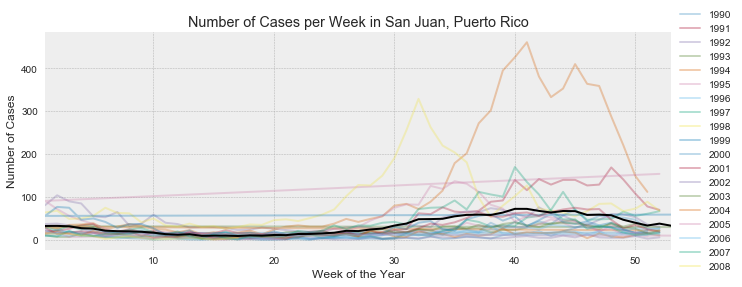

In [404]:
# plot cases for each week each year in san juan

for i in set(target_sj['year']):
    df = target_sj[target_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
target_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(target_sj['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

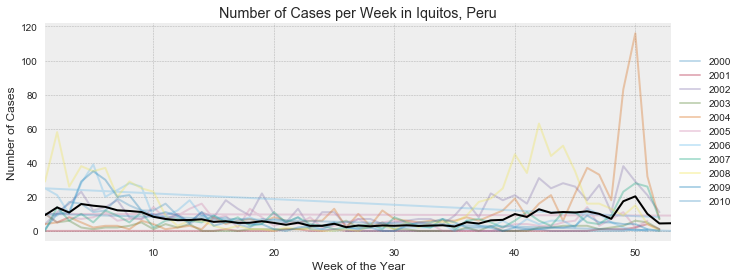

In [405]:
# plot cases for each week each year in iquitos

for i in set(target_iq['year']):
    df = target_iq[target_iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)

target_iq.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(target_iq['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in Iquitos, Peru')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

## Target Conclusions

There are outbreaks in both Iquitos and San Juan toward the ends of each year. The increases in cases and outbreaks tend to happen in weeks 35 to 45 in San Juan and weeks 45 to 50 in Iquitos.

## Next Steps

There are two methods and models I want to explore initially:

* ARIMA: Also known as Autoregressive Integrated Moving Average, this model looks at a previous amount of time in part of it's predicting of the future.
* Decision Tree Classifier: This is an unorthodox method for a time-series. However, it can be adapted with some data munging efforts. Each week's observations can have tacked onto it the previous X amount of weeks information (such as number of cases). With the previous weeks data in the observation, it can use historical information to predict the number of cases.